# If using PDF to text conversion

In [1]:
## Install if needed
#!pip install tika

## Tika also needs Java on machine
# - Download from https://www.oracle.com/java/
# - Check it is there with: "java - version"

In [ ]:
# Setup and define function for parsing

# Uncomment if using Tika to convert from .pdf to text
"""
from tika import parser
def convertPdf2TxtWithTika(in_pdf_file, out_text_file):
    # Load a file and extract information
    print ("INFO: - reading file = " + in_pdf_file)
    
    raw = parser.from_file(in_pdf_file)
    text = raw['content']
    
    ## Post-processing explained at: 
    # https://medium.com/@justinboylantoomey/fast-text-extraction-with-python-and-tika-41ac34b0fe61
    # Convert to string
    text = str(text)
    # Ensure text is utf-8 formatted
    safe_text = text.encode('utf-8', errors='ignore')
    # Escape any \ issues
    safe_text = str(safe_text).replace('\\', '\\\\').replace('"', '\\"')
    
    # Write out extracted content
    text_pdf = open(out_text_file, 'w')
    print ("INFO: - writing file = " + out_text_file)
    text_pdf.write(text)
    text_pdf.close()
"""


In [ ]:
# Find pdf files in a directory and process its content

# Uncomment to do the conversion
"""
import glob
import os

txtfiles = []
inpath = 'data/input/'
outpath = 'data/output/'
count = 0
for file in glob.glob(inpath + '*.pdf'):
    justfile = os.path.basename(file)
    justfile = justfile.replace(".pdf","")
    print('INFO: processing file = ' + os.path.basename(file))
    output_file = outpath + justfile + '.txt'
    print('INFO: - in = ' + file + ', out = ' + output_file)
    convertPdf2TxtWithTika(file, output_file)
    count = count + 1
print('INFO: processed total files = ' + str(count))
"""


# Word tag cloud for course description

In [2]:
## Install as appropriate
# !pip install wordcloud

In [3]:
# Now we define a function to do word cloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

In [4]:
# Open file and get content
file = 'data/input/Example-CSCE590-1-d2dcourse-Spring2021.txt'
file_handle = open(file, 'r')
content = str( file_handle.read()).split()
file_handle.close()

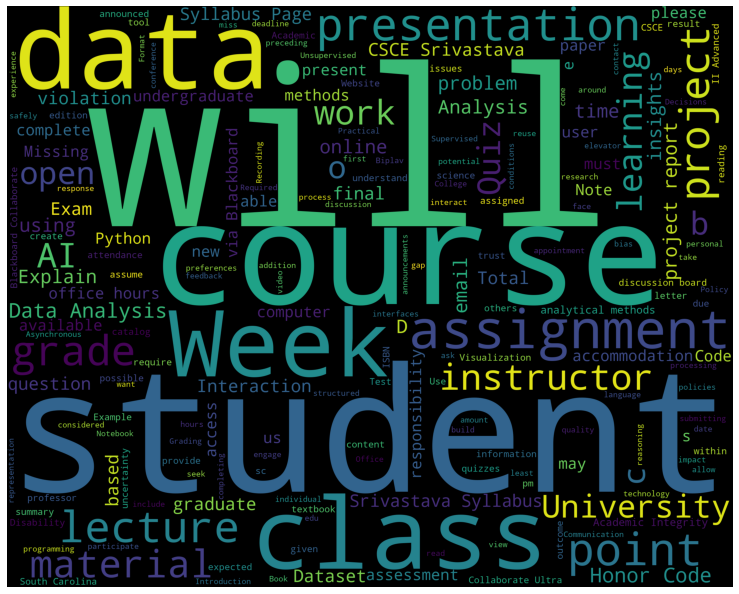

In [5]:
# Draw the visualization
wordcloud_draw(content)

# Do word tag for all documents

In [6]:
# We put another document for weather report
# - SC 2020 Weather overview: https://www.dnr.sc.gov/climate/sco/ClimateData/yearly/cli_sc2020review.pdf

In [7]:
# Open file and get content
file = 'data/input/Example-SC-weather-data.txt'
file_handle = open(file, 'r')
content = str( file_handle.read()).split()
file_handle.close()

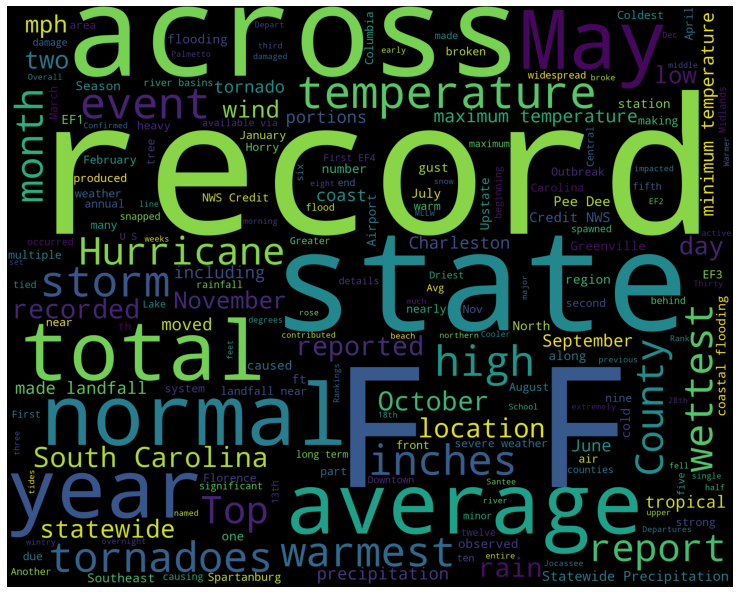

In [8]:
# Draw the visualization
wordcloud_draw(content)

In [9]:
# Show Word tag for all docs in a dir - Meaningless but for demonstration


import glob
import os

# Get content in all files into one string 
pathFilesToUse = 'data/input/'

all_content = ''
count = 0
for file in glob.glob(pathFilesToUse + '*.txt'):
    print("file = " + file)
    
    file_handle = open(file, 'r')
    content = str( file_handle.read()).split()
    
    
    #content_as_str = " ".join(sorted(set(content), key=content.index))
    # Has duplicates
    
    content_as_str = " ".join(content)
    
    # All together
    all_content = all_content + content_as_str
    #all_content.append(content)
    
    # Keep track of file count
    count = count + 1
    
    # Close file
    file_handle.close()

print('INFO: processed total files = ' + str(count))


file = data/input/Example-SC-weather-data.txt
file = data/input/Example-CSCE590-1-d2dcourse-Spring2021.txt
INFO: processed total files = 2


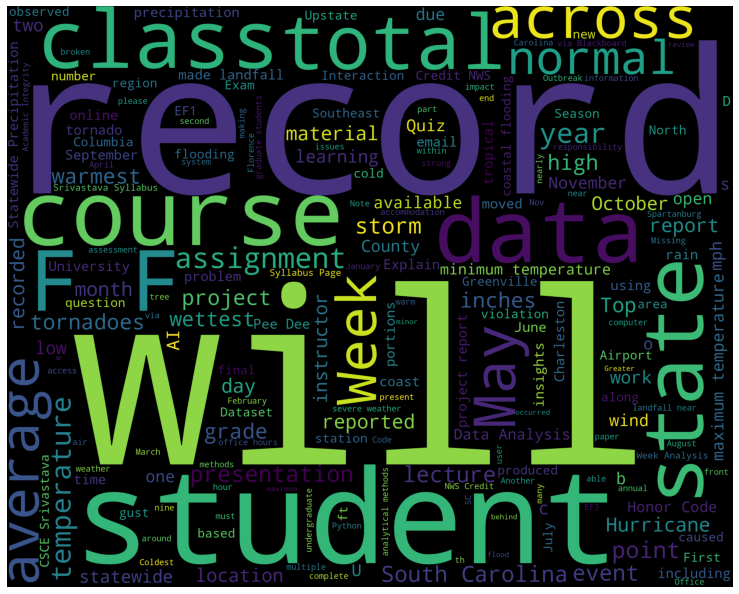

In [10]:
# Now do word tag cloud
wordcloud_draw(all_content.split())

# For advanced analysis
See https://www.datacamp.com/community/tutorials/wordcloud-python